# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split the data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mit-pe/elective project/machine learning/Boston.csv")

## Data Overview

- Observations
- Sanity checks

**First Impressions**

The dataset is odd, because each row is about a home, while several of the stats of the home are about the area the home is in. When knowing about that specific home sale would be more informative.

As an example: Answering "identify the most important features affecting the price of the house," it lacks reason that the number of rooms IN THAT HOME isnt a feature but the average number of rooms of houses in the same town/suburb is.

After doing some googling, there is a few missing features that would help this make sense. Each row is a tract of land within a township. That is why all the information is about averages or median WITHIN that tract.

In [ ]:
# trying to get the column names to be pythonic
df.columns = [x.lower() for x in df.columns]
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
df.shape

(506, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


No null values. Its all numeric which is nice. No need to one hot encode.



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


The chas mean being low means its a very skewed number

In [ ]:
df.chas.value_counts()

0    471
1     35
Name: chas, dtype: int64

Heavily skewed toward most properties not being bound by the Charles River.

In [ ]:
df.rad.value_counts().sort_index()

1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
Name: rad, dtype: int64

This value being continous 1 through 8 then jumping to 24 is odd. This is a categorical variable. "Index of accessibility to radial highways" I will explore it in a bit

In [ ]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
lstat      455
medv       229
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

In [ ]:

feature_lookup = {
'crim': 'Per capita crime rate by town',
'zn': 'Proportion of residential land zoned for lots over 25,000 sq.ft.',
'indus': 'Proportion of non-retail business acres per town',
'chas': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
'nox': 'Nitric Oxide concentration (parts per 10 million)',
'rm': 'The average number of rooms per dwelling',
'age': 'Proportion of owner-occupied units built before 1940',
'dis': 'Weighted distances to five Boston employment centers',
'rad': 'Index of accessibility to radial highways',
'tax': 'Full-value property-tax rate per 10,000 dollars',
'ptratio': 'Pupil-teacher ratio by town',
'lstat': '% lower status of the population',
'medv': 'Median value of owner-occupied homes in 1000 dollars'
}



###1. What does the distribution of 'MEDV' look like?

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (10, 7), kde = False, bins = None, norm_overlay = False, title = 'Histogram Boxplot', xlabel = ''):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    title: title for the plot (default Histogram Boxplot)
    xlabel: x-axis label (default feature)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, meanline=True, showmeans=True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, palette = "winter"
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

    if xlabel == '':
        ax_hist2.set_xlabel(feature)
    else:
        ax_hist2.set_xlabel(xlabel)
    plt.suptitle(title)
    plt.show()

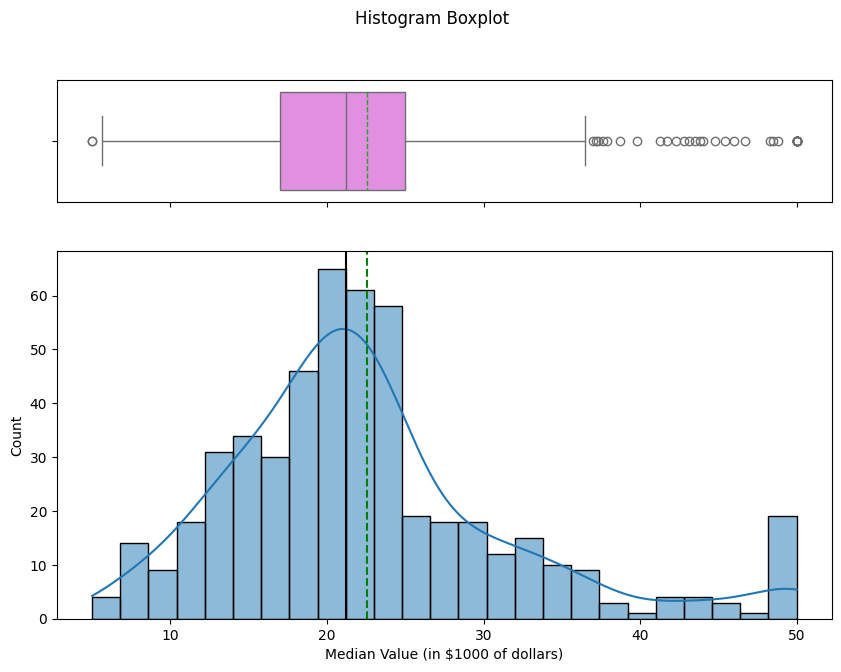

In [ ]:
histogram_boxplot(df, feature = "medv", kde=True, bins=25, xlabel='Median Value (in $1000 of dollars)')

A. It is right skewed with a right tail. We try a log transform on it when training to reduce the skew

###2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?

In [1]:
#Lets start by building a heat map of all values
from matplotlib.patches import Rectangle

# show a heatmap that is built from corr() matrix, that highlights cells +/- a threshold
def heatmap_highlight(df, hl_threshold=0.70, hl_color='yellow'):
  corr = df.corr()
  plt.figure(figsize = (10, 5))
  h = sns.heatmap(corr, annot = True, fmt = ".3f", linewidth=0.5, cmap = sns.color_palette("ch:s=-.6,r=.6", as_cmap=True))
  h.set_title('Correlation Heatmap')
  x, y = corr.shape
  for i in range(x):
    for j in range(y):
      if((corr.iloc[i, j] >= hl_threshold or corr.iloc[i, j] <= (-1 * hl_threshold)) and i != j):
        h.add_patch(Rectangle((i, j), 1, 1, fill=False, edgecolor=hl_color, lw=3))
  plt.show()

heatmap_highlight(df)

NameError: name 'df' is not defined

###3. What are all the inferences that can be found by doing univariate analysis for different variables?


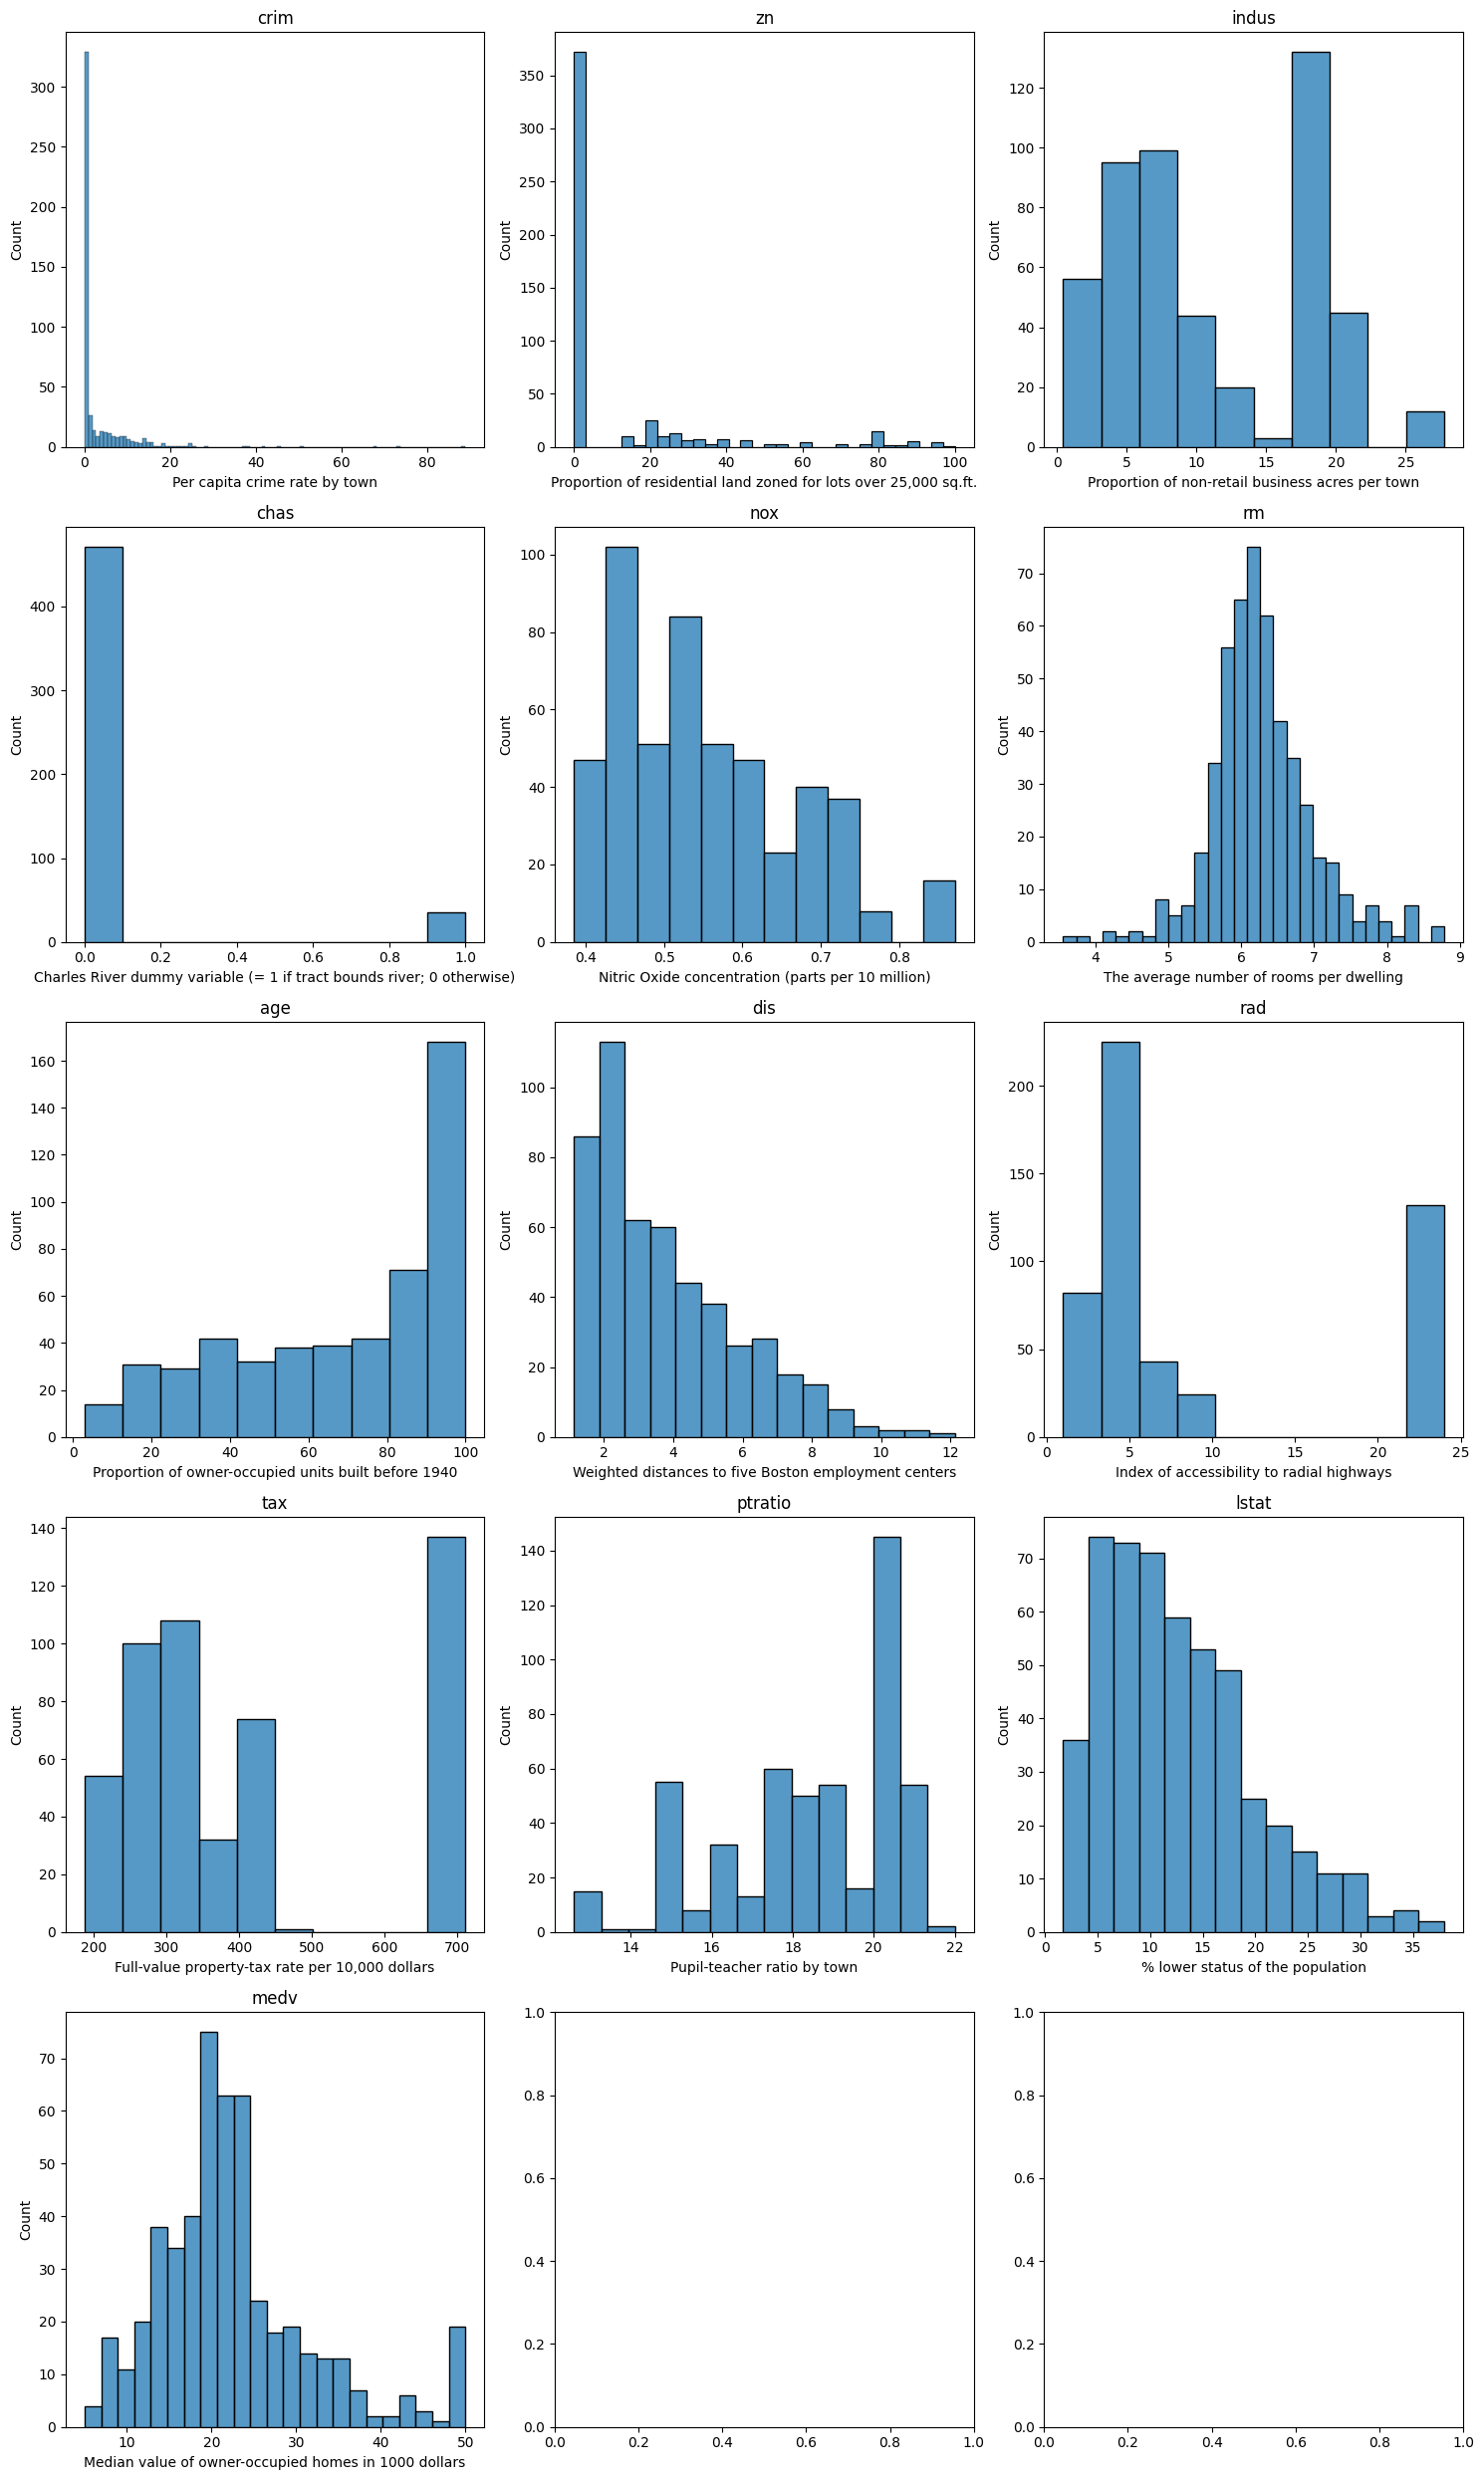

In [ ]:
import math

headers = list(df.select_dtypes(pd.np.number))
numcols = 3
rows = math.ceil(len(headers) / numcols)
fig, axes = plt.subplots(rows, numcols, figsize=(15, rows*5))
for i, col in enumerate(headers):
  ax = axes[i // numcols, i % numcols]
  ax.set_title(col)
  sns.histplot(data=df, x=col, ax=ax)
  ax.set_xlabel(feature_lookup[col])
  plt.tight_layout()
plt.show()


In [ ]:
# helper function for univariate analysis
def univariate_histplot_analysis(df, feature, bins = None):
  histogram_boxplot(df, feature = feature, kde=True, bins = bins, title='Univariate Analysis for Feature: ' + feature, xlabel=feature_lookup[feature])

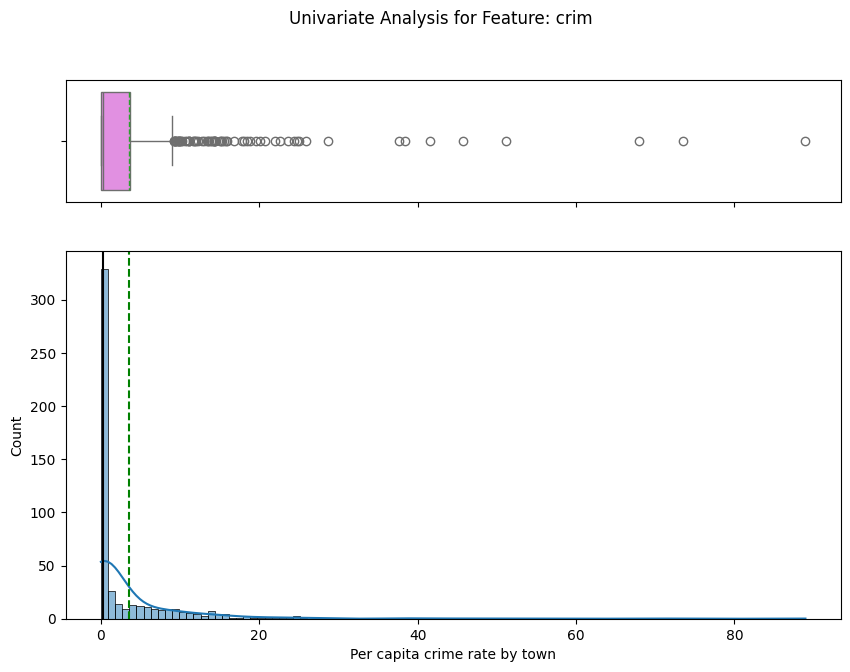

In [ ]:
univariate_histplot_analysis(df, 'crim')

**Crime**

Large crime is focused on a few homes. Most homes experience relatively low crime. Heavily right skewed data.

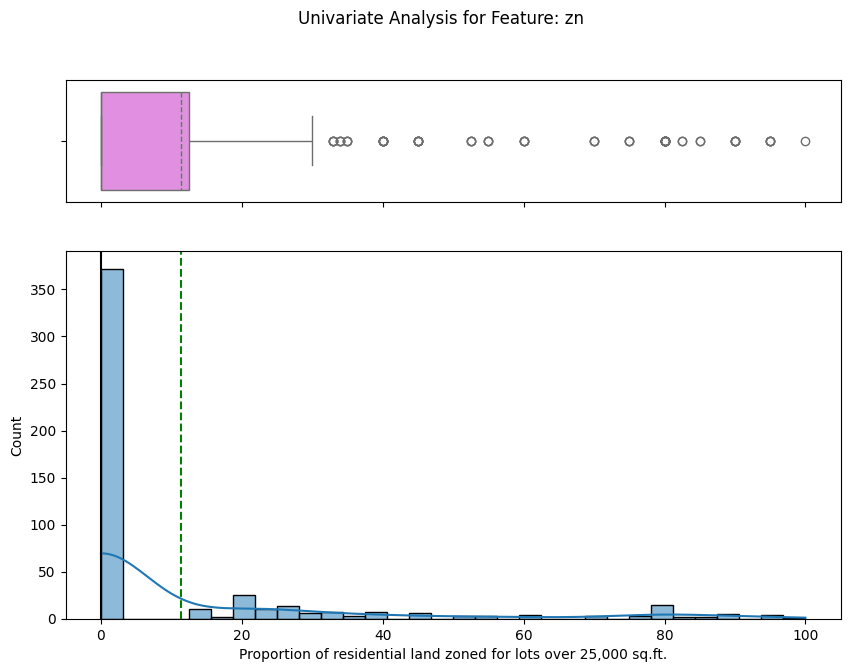

In [ ]:
univariate_histplot_analysis(df, 'zn')

**Zoning > 25000 Sq Ft**

Like crime, heavily right skewed data with most data showing areas with low amounts of zoning for residential areas over 25000ft. A higher proportion here would be indicate less dense housing.

In [ ]:
df.indus.value_counts().sort_values(ascending=False).head()

18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
Name: indus, dtype: int64

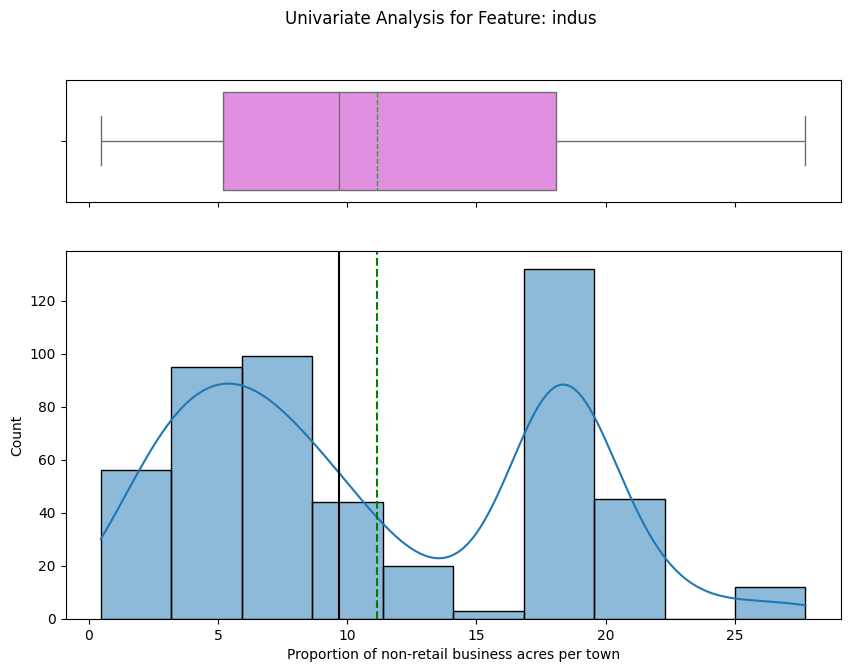

In [ ]:
univariate_histplot_analysis(df, 'indus')

**Non-retail Business Proportion**

Non-retail Business would indicate industrial/manufacturer without storefronts. Bi modal distribution with some areas having larger portion of industry. 18.1 seems to have an outsized amount of numbers. Guessing this might be a limit shared in many tracts.

In [ ]:
print(df.chas.value_counts())
print(feature_lookup['chas'])


0    471
1     35
Name: chas, dtype: int64
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)


**Charles River Dummy Variable**

This is just a yes or no if the "tract" touches the river. It would stand to reason that land touching this river would be worth more.

"The Charles River is the most prominent urban river in New England. It is a major source of recreation and a readily-available connection to the natural world for residents of the Boston metropolitan area" [EPA.gov](https://www.epa.gov/charlesriver/about-charles-river#:~:text=The%20Charles%20River%20is%20the,of%20the%20Boston%20metropolitan%20area.)

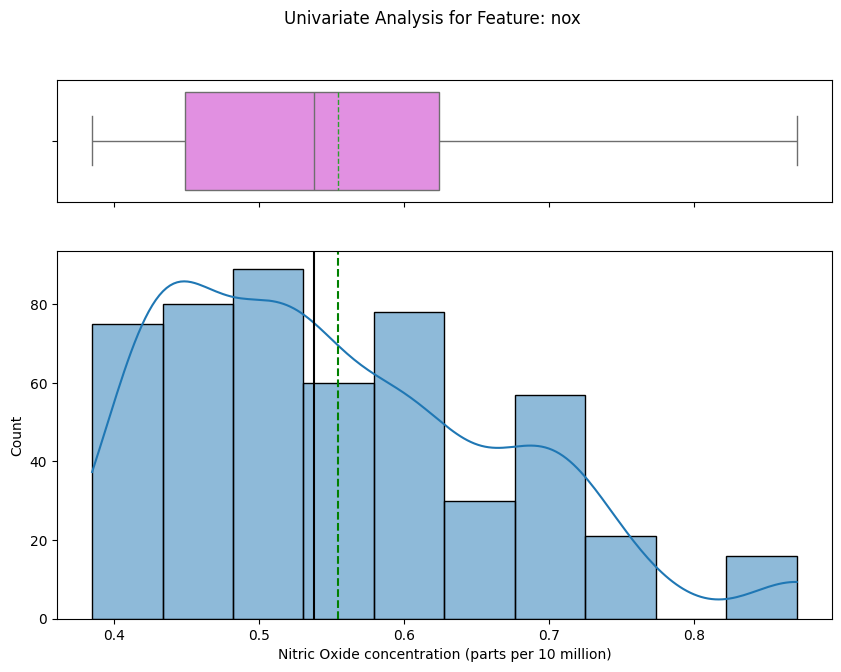

In [ ]:
univariate_histplot_analysis(df, feature = 'nox', bins=10)

**Nitric Oxide Concentration**

Slightly right skewed data set, indicating that the majority of areas having lower concentrations. It has a lot of uniformity in it. I moved around the number of bins with the data, and at higher bin counts, the data is very noisy. Some assumptions to be made are that since the area is including all of boston, that pollution would diffuse, meaning that just because an area doesn't have a lot of industry, doesn't mean they wont be higher on concentration.

In [ ]:
df.rm.describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: rm, dtype: float64

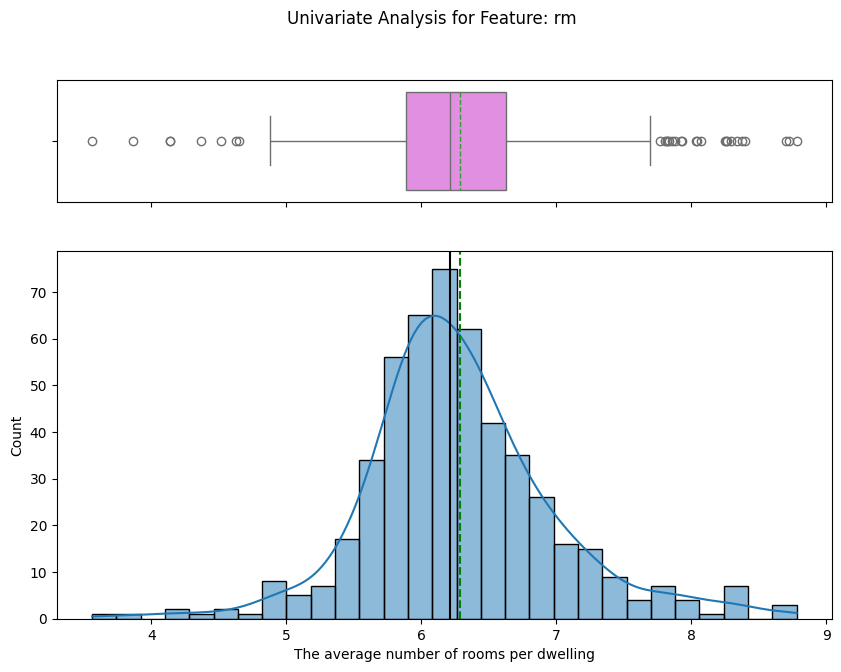

In [ ]:
univariate_histplot_analysis(df, 'rm')

**Average number of rooms per dwelling**

Average number of rooms per dwelling is very normalized. This statistic is confusing, because it is about the homes in the area of the dwelling, instead of the home itself that was sold. Some assumptions need to be made that homes in an area have some homogeny

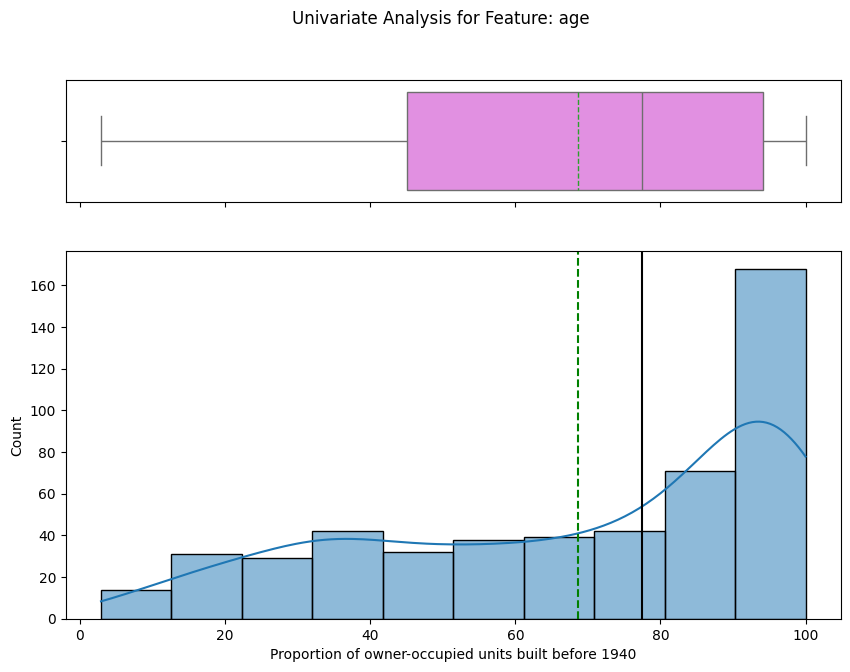

In [ ]:
univariate_histplot_analysis(df, 'age')

**Age**

This stat is left skewed. This data is from 1970, so these are homes that are older and occupied than 30 years. There are many areas that have a greater proportion of homes that was occupied and older than 30 years old.

What this reads as, is there only a few areas that are have a large percentage of homes built within the last 30 years.

In [ ]:
df.dis.describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: dis, dtype: float64

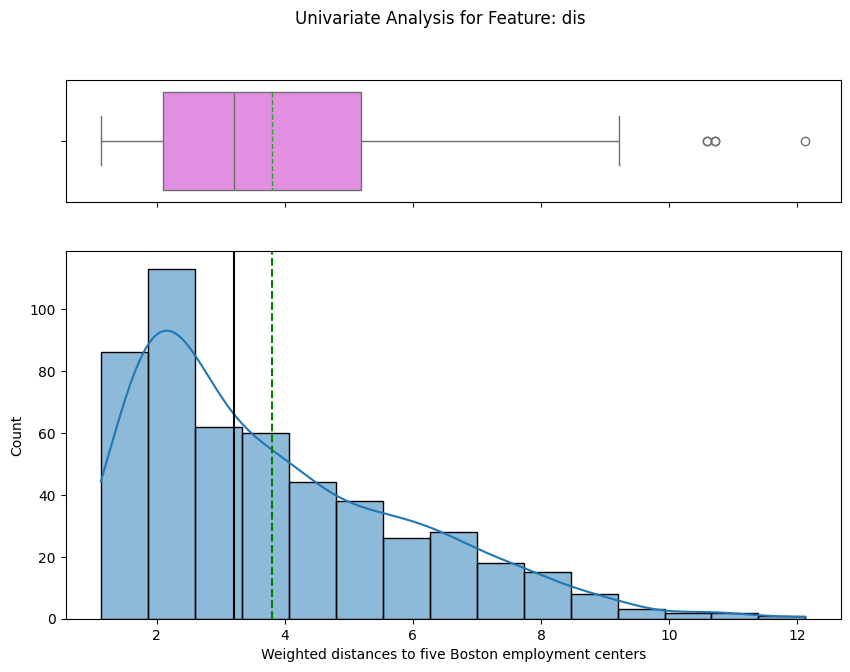

In [ ]:
univariate_histplot_analysis(df, 'dis')

**Weighted Distance to Five Employment Centers**

Houses cluster to areas closer to employment centers. This makes sense. Less people want to live a large drive away from the major employment centers

In [ ]:
df.rad.describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: rad, dtype: float64

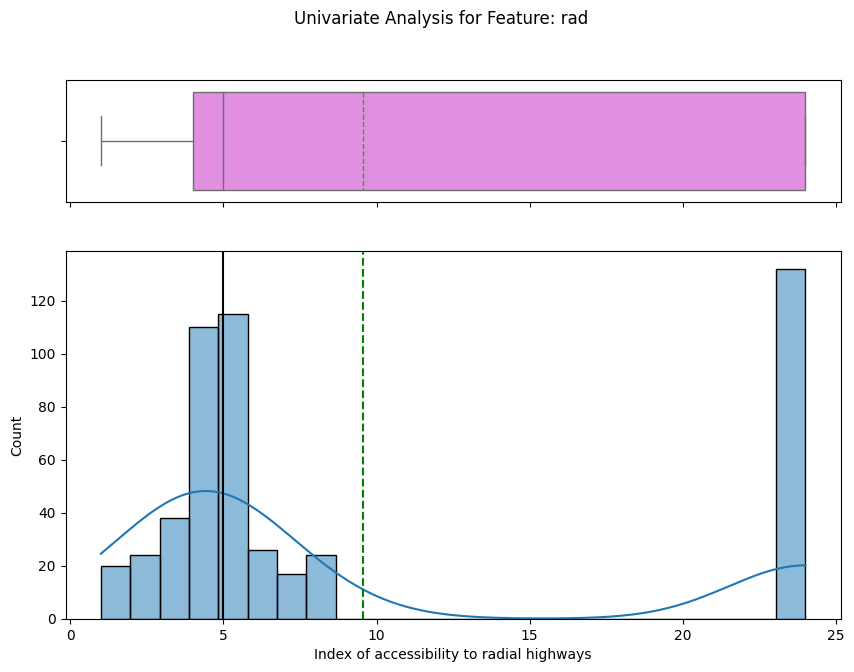

In [ ]:
univariate_histplot_analysis(df, 'rad', bins = df.rad.max() - df.rad.min() + 1)

**Index of accessibility to radial highways**

This is numeric, however its an ordinal categorical variable. The integers are discrete and the ordering of them matters (more is better).

In [ ]:
df.tax.nunique()

66

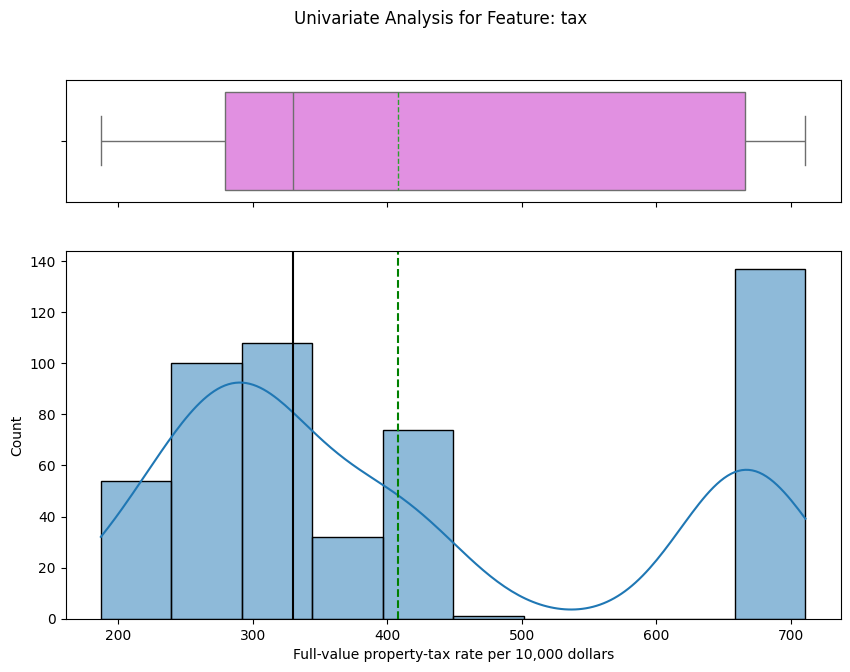

In [ ]:
univariate_histplot_analysis(df, 'tax', bins=10)


**Property Tax Value**

This is constant within the tract. There is 66 different tax rates among all the tracks.

As per Table IV of Harrison & Rubin (1978) "Full value property tax rate (per $10,000). Measures the cost of public services in each community. Nominal tax rates were corrected by local assessment ratios to yield the full value tax rate for each town. Intratown differences in the assessment ratio were difficult to obtain and thus not used. The coefficient of this variable should be negative"

In [ ]:
df.ptratio.nunique()

46

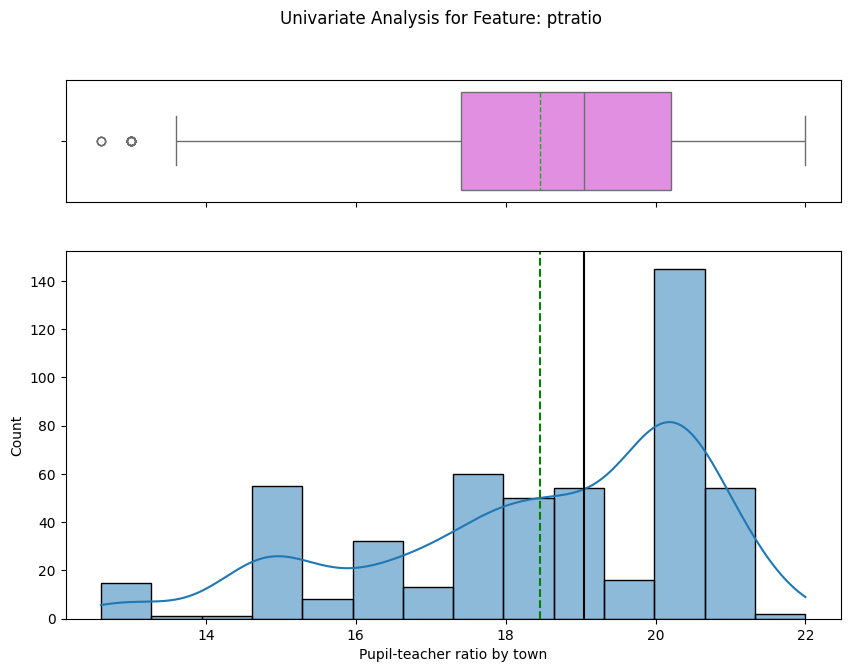

In [ ]:
univariate_histplot_analysis(df, 'ptratio')

**Pupil-Teacher Ratio**

Its appears the data is discrete from 12.6 to 22.0, increasing by tenths. However, this just may be rounding for the data input. 20.2 is the dominate ratio with 140 counts. Treating this as ordinal is probably not the correct answer as we want to maximize flexibility.

This is essentially constant within the tract. There is 46 different Pupil-teacher rates among all the tracks. This will be decided based on the tract.

In [ ]:
df.lstat.nunique()

455

In [ ]:
df.lstat.describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

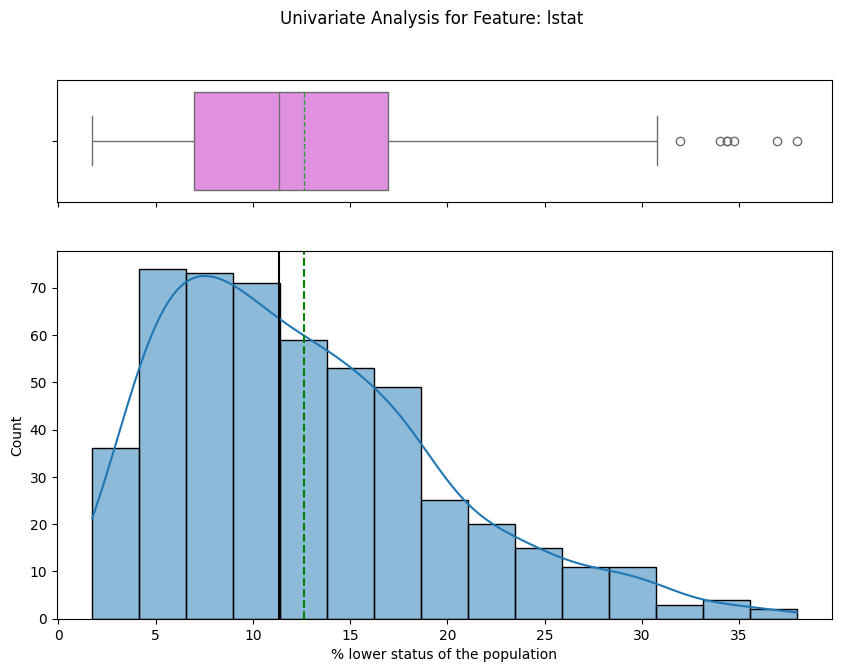

In [ ]:
univariate_histplot_analysis(df, 'lstat')

**Lower Status**

As per Table IV of Harrison & Rubin (1978) "Proportion of population that is lower status = ½ (proportion of adults without some high school education and proportion of male workers classified as laborers). The logarithmic specification implies that socioeconomic status distinctions mean more in the upper brackets of society than in the lower classes"

This is the % of "Lower Status" citizens in the tract. Right skewed data with the 1.73% to 37.97% spread.

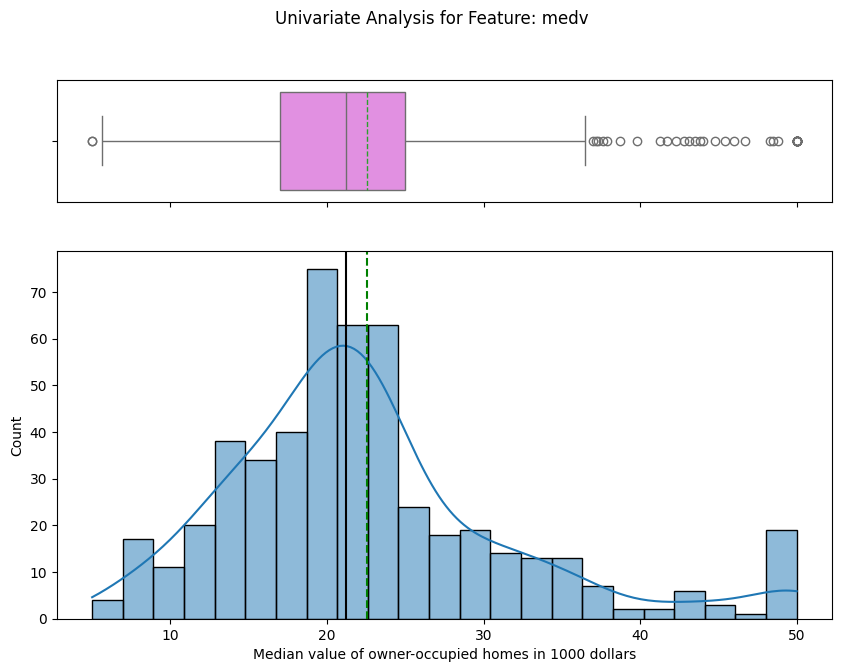

In [ ]:
univariate_histplot_analysis(df, 'medv')

###4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

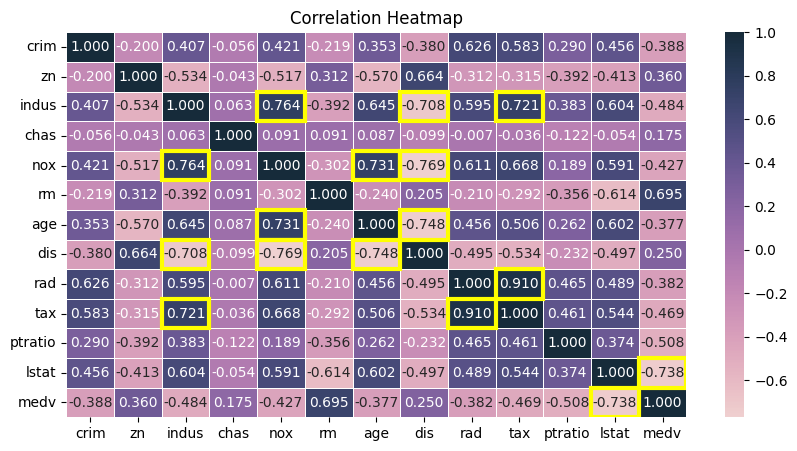

In [ ]:
#pull up the heatmap again
heatmap_highlight(df)

**Pairs to focus on**
1. indus - nox
2. indus - dis
3. indus - tax
4. nox - age
5. nox - dis
6. age - dis
7. rad - tax
8. lstat - medv
9. (bonus) rm - medv

Significant correlations are being defined as >= 0.7 or <= 0.7 however, I am going to include rooms, as its close and makes a lot of sense.

In [ ]:
def scatter_with_label(df, x, y):
  plt.figure(figsize = [8, 6])
  sns.regplot(x = df[x], y = df[y])
  plt.xlabel(feature_lookup[x])
  plt.ylabel(feature_lookup[y])
  plt.show()

#### 1. indus - nox

In [ ]:
df.indus.value_counts().sort_values(ascending=False).head()

18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
Name: indus, dtype: int64

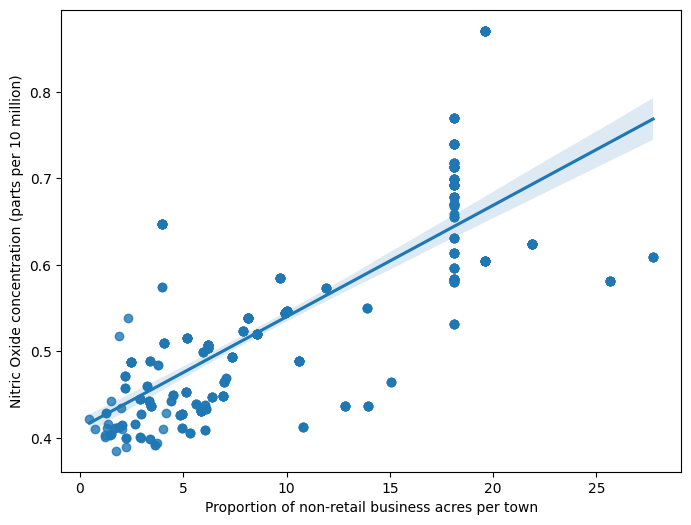

In [ ]:
scatter_with_label(df, 'indus', 'nox')

There is a general trend, the more non-retail business acers per town (industry) the more nitric oxide concentration. This makes sense. You can also clearly see the 18.1 line.

####2. indus - dis

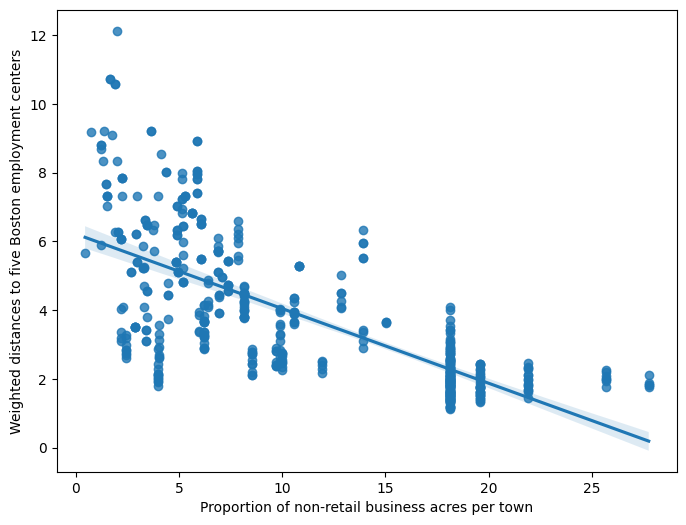

In [ ]:
scatter_with_label(df, 'indus', 'dis')

There is a negative correlation with regardes to distance to employment senters, with how industrial an area is. This makes sense, the industrial areas would also be close to major hubs of employment.

####3. indus - tax

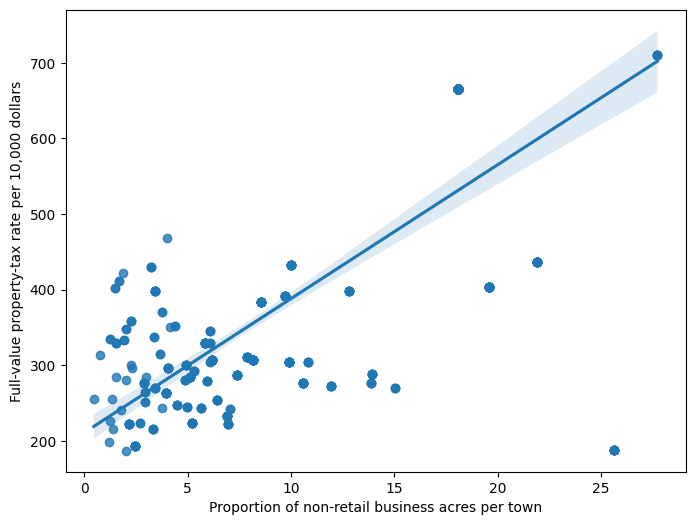

In [ ]:
scatter_with_label(df, 'indus', 'tax')

This correlation is showing a higher tax rate for area with higher levels of industry. Taxing industrial areas more heavily, than less industrial areas.

####4.nox - age

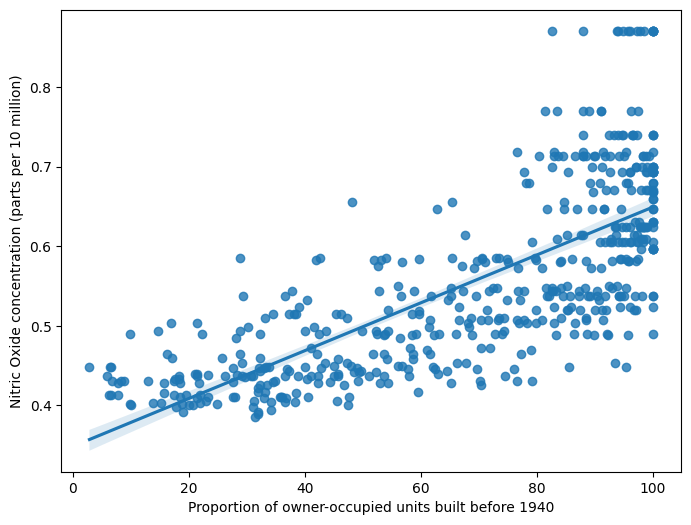

In [ ]:
scatter_with_label(df, 'age', 'nox')

As you get to older areas, there is a higher concentration of nitric oxide. With only the highest level of concentration being in the very oldest tracts.

####5. nox - dis

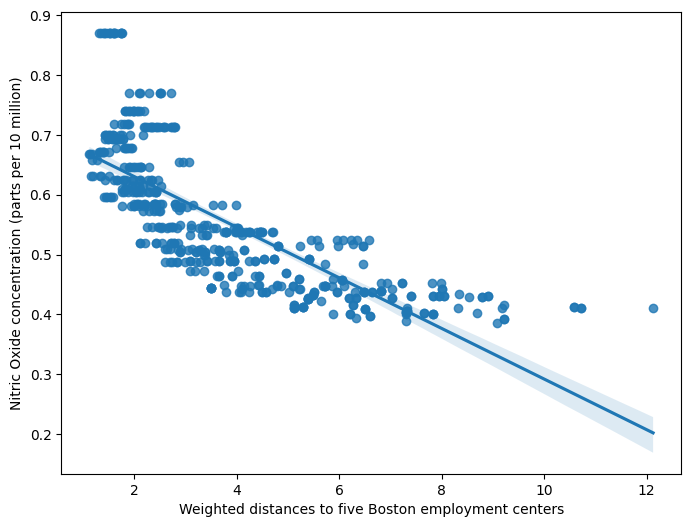

In [ ]:
scatter_with_label(df, 'dis', 'nox')

This makes sense. The major employment centers are closest to the industry. Pollution would be more concentrated in this areas.

####6. age - dis

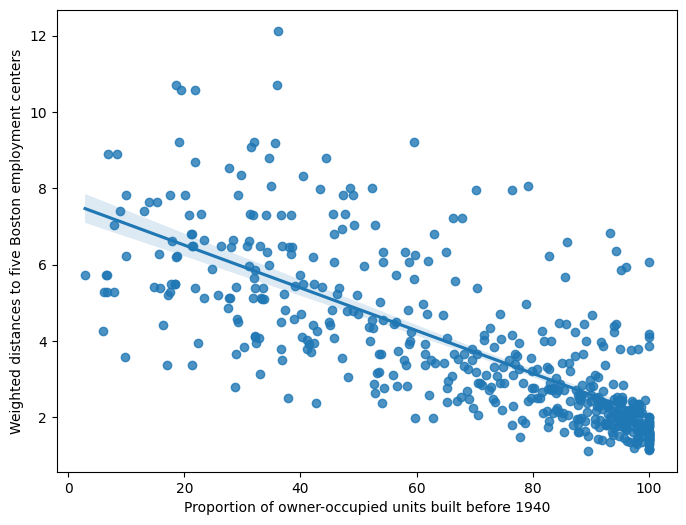

In [ ]:
scatter_with_label(df, 'age', 'dis')

The older homes are more concentrated to the major employment centers.

####7. rad - tax

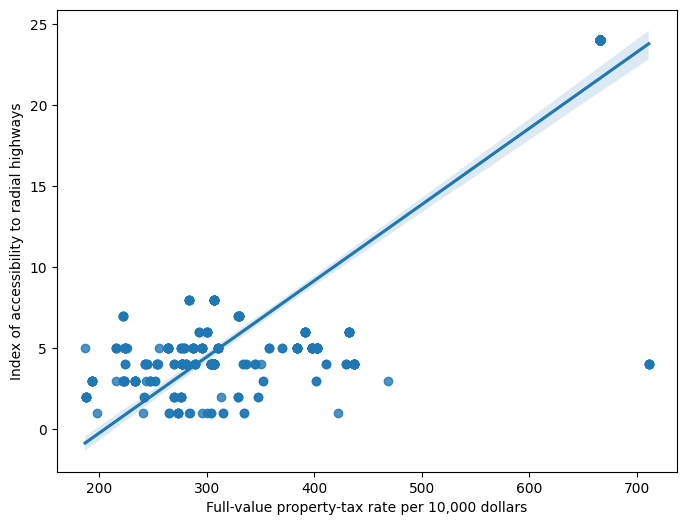

In [ ]:
scatter_with_label(df, 'tax', 'rad')

There is such a strong correlation between these two, but this scatter plot doesnt seem to be revealing it.

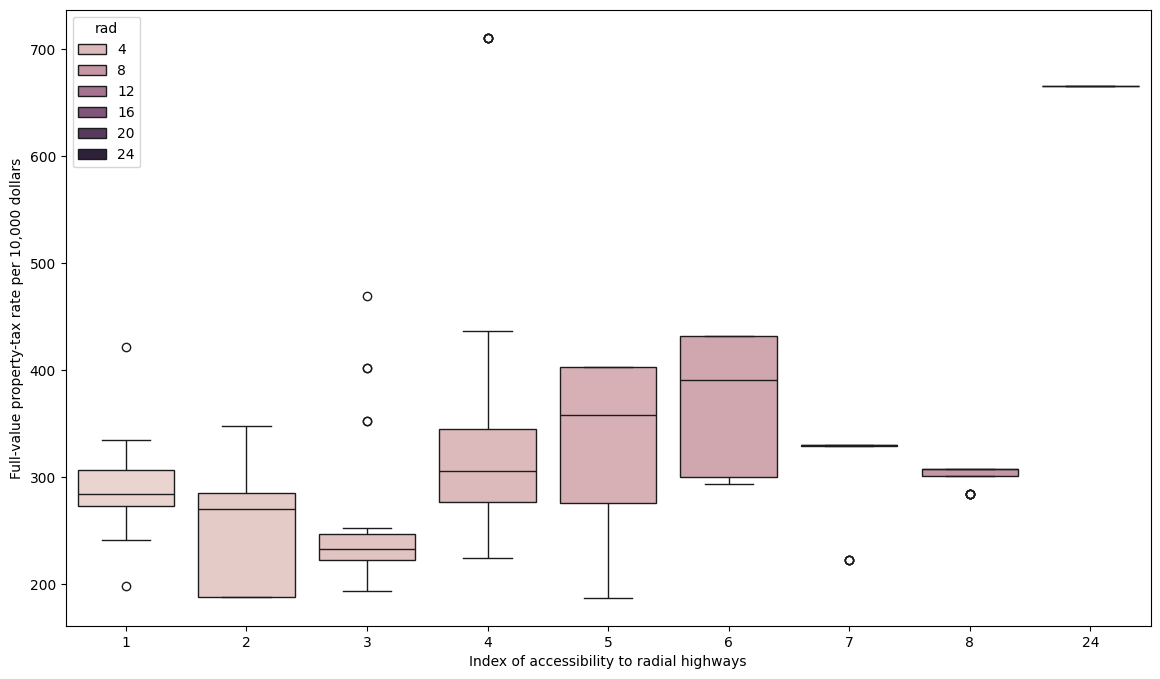

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(df, x=df.rad, y=df.tax, hue='rad')
plt.xlabel(feature_lookup['rad'])
plt.ylabel(feature_lookup['tax'])
plt.show()

It seems the 24 radial highways is very concentrated on tax value.

In [ ]:
high_rads = df[df.rad == 24]
print(high_rads.tax.count())
print(high_rads.tax.nunique())
print(df.rad.median())

132
1
5.0


This is could have an impact on the data due to extreme outlier that this tax rate and rad is. Will consider removing rad or tax out before final model. I could consider adjusting the rads to the median (5.0)

In [ ]:
df[df.rad == 4].tax.max()

711

In [ ]:
df[df.tax == 711]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,29.68,8.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,13.35,20.1


In [ ]:
print(df[df.tax == 711].medv.mean())
print(df.medv.mean())

12.8
22.532806324110677


Trimming 5 records for the 711 tax rate in a data set that is only 506 records is a bit heavy handed. If we trimmed the 24 rad set, that is 132 data points and is completely undoable.

These may just be expensive areas. I will maintain consideration for addressing these outliers, but for now lets assume they are good but extreme data.

####8. lstat - medv

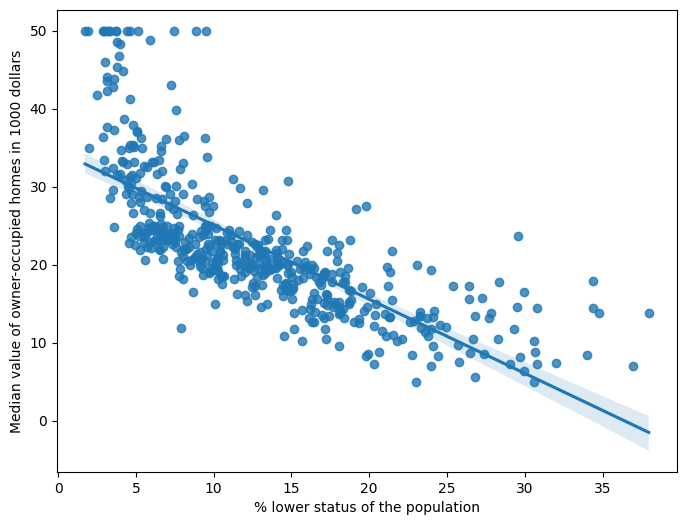

In [ ]:
scatter_with_label(df, 'lstat', 'medv')

The higher the percentage of population in a "lower status", the lower the median value of homes. You can see where the median value of homes is capped at 50000 clearing in this plot.

####9. (bonus) rm - medv

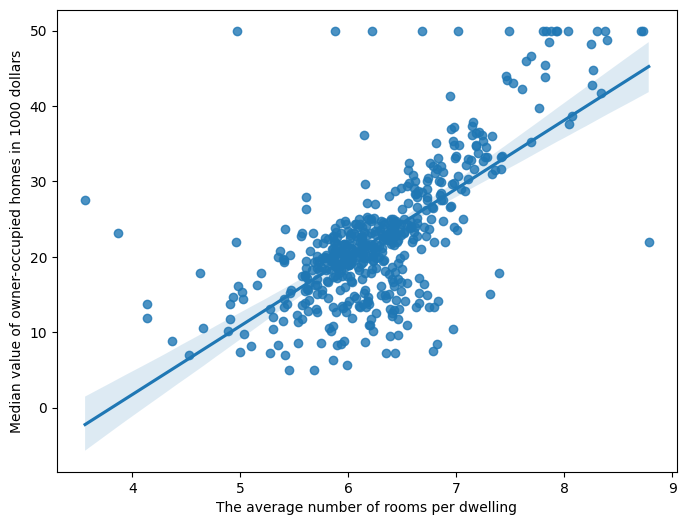

In [ ]:
scatter_with_label(df, 'rm', 'medv')

Roughly, having more rooms in the house lends itself to being worth more.

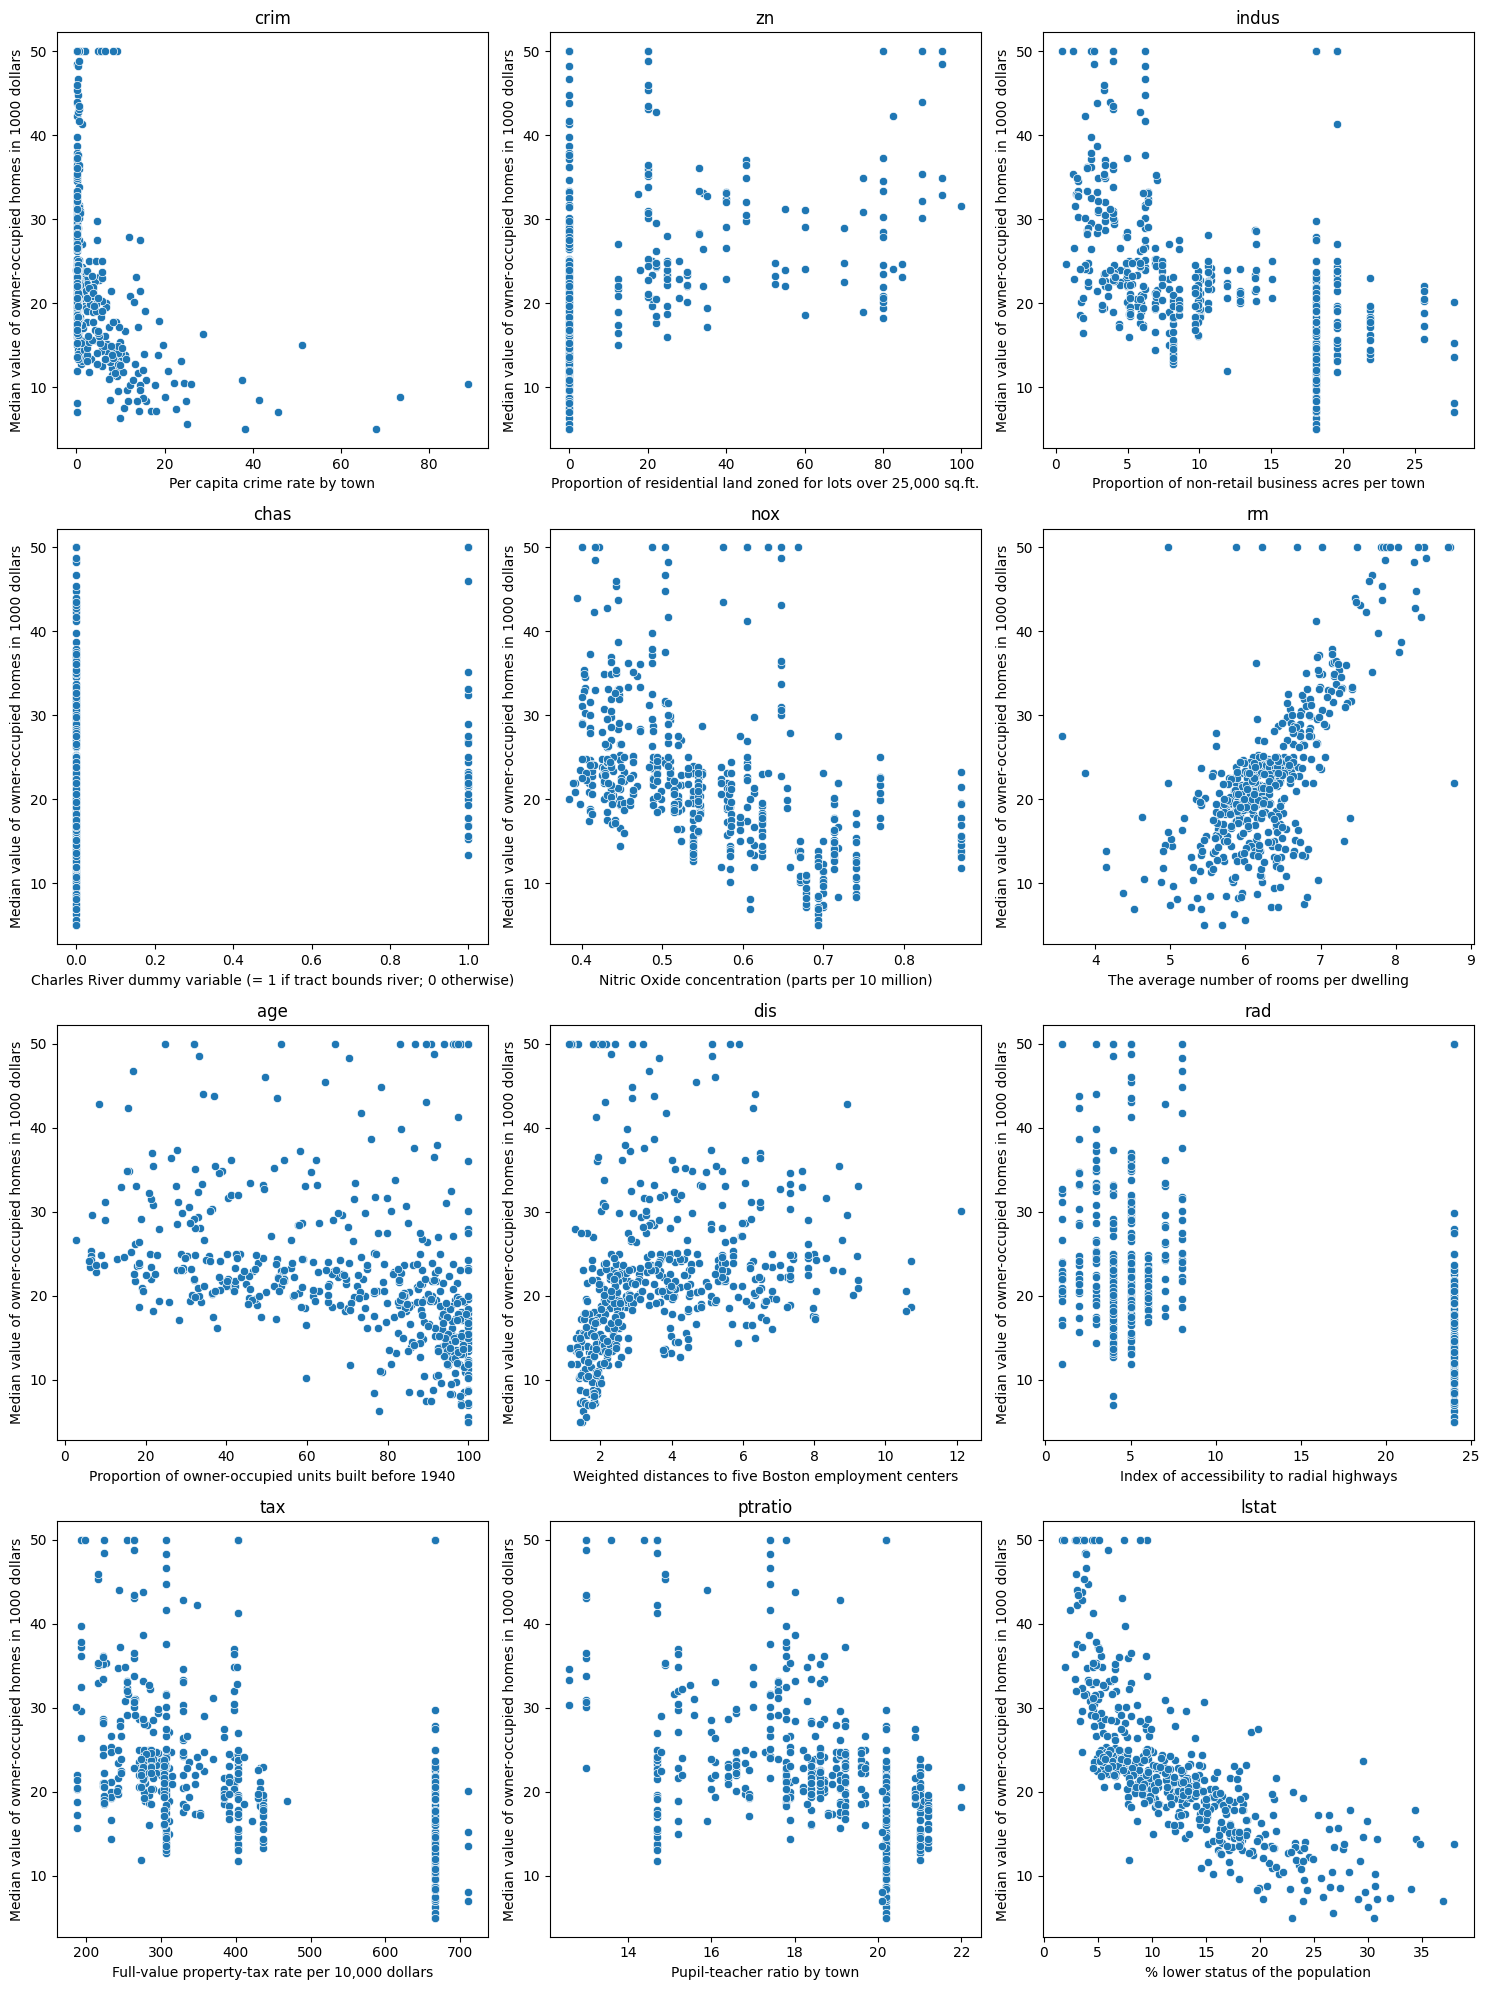

In [ ]:
import math

headers = list(df.drop("medv", axis='columns'))
numcols = 3
rows = math.ceil(len(headers) / numcols)
fig, axes = plt.subplots(rows, numcols, figsize=(15, rows*5))
for i, col in enumerate(headers):
  ax = axes[i // numcols, i % numcols]
  ax.set_title(col)
  sns.scatterplot(df, y='medv', x=col, ax=ax)
  ax.set_xlabel(feature_lookup[col])
  ax.set_ylabel(feature_lookup['medv'])
  plt.tight_layout()
plt.show()


##Data Preprocessing

In [ ]:
olddf = df.copy()

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment


In [ ]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

There are no missing values to treat with this.

###Log transformation of dependent variable if skewed

In [ ]:
df.medv = np.log(df.medv)

### Feature engineering (if needed)

###Outlier detection and treatment (if needed)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def check_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

###Preparing data for modeling

In [ ]:
df.chas = df.chas.astype('category')

In [ ]:
df = pd.get_dummies(df, columns=['chas'])
df = df.rename(columns={'chas_0': 'chas_no', 'chas_1': 'chas_yes'})
df.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,chas_no,chas_yes
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,3.178054,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,3.072693,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,3.546740,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,3.508556,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,3.589059,1,0


In [ ]:
# start by splitting the data
x = sm.add_constant(df.drop('medv', axis=1))

#log transform here
y = df.medv

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 13)

Because the variables have largely different min/max values, we want to learn from all the variables.

In [ ]:
# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
x_train_scaled = scaler.fit_transform(x_train)
# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
x_train_scaled = pd.DataFrame(x_train_scaled, index = x_train.index, columns = x_train.columns)

x_train_scaled.head()

,const,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,chas_no,chas_yes
475,0.0,0.071758,0.0,0.646628,0.404564,0.503679,0.973223,0.113831,1.000000,0.913958,0.808511,0.674596,1.0,0.0
489,0.0,0.001959,0.0,1.000000,0.456432,0.358830,0.982492,0.066180,0.130435,1.000000,0.797872,0.670631,1.0,0.0
298,0.0,0.000625,0.7,0.065249,0.022822,0.539117,0.177137,0.708347,0.173913,0.325048,0.234043,0.091186,1.0,0.0
100,0.0,0.001569,0.0,0.296921,0.271784,0.613091,0.792997,0.174300,0.173913,0.374761,0.882979,0.226898,1.0,0.0
223,0.0,0.006807,0.0,0.210411,0.244813,0.591983,0.802266,0.226573,0.304348,0.227533,0.510638,0.171394,1.0,0.0


In [ ]:
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, index = x_test.index, columns = x_test.columns)

x_test_scaled.head()

,const,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,chas_no,chas_yes
477,0.0,0.204237,0.000000,0.636089,0.471193,0.251185,0.971215,0.087693,1.000000,0.914122,0.883721,0.639625,1.0,0.0
451,0.0,0.073915,0.000000,0.636089,0.674897,0.542223,0.980810,0.110851,1.000000,0.914122,0.883721,0.441501,1.0,0.0
29,0.0,0.013548,0.000000,0.260098,0.314815,0.546316,0.864606,0.282269,0.130435,0.229008,0.976744,0.282837,1.0,0.0
0,0.0,0.000000,0.189474,0.040015,0.314815,0.524989,0.628998,0.268711,0.000000,0.208015,0.313953,0.089680,1.0,0.0
312,0.0,0.003473,0.000000,0.326538,0.327160,0.406075,0.897655,0.154420,0.130435,0.223282,0.674419,0.275662,1.0,0.0


###Any other preprocessing steps (if needed)

## Model Building - Linear Regression

In [ ]:
# Create a base model with everything
model0 = sm.OLS(y_train, x_train_scaled).fit()

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

###1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_perf(olsmodel, x_train, y_train,  x_test, y_test):

    # In-sample Prediction - np.exp to get it back into our expanded form
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAPE" : [
                    mean_absolute_percentage_error(y_pred_train, y_observed_train),
                    mean_absolute_percentage_error(y_pred_test, y_observed_test)
                ],

                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [ ]:
# Get the model summary
print(model0.summary())
print(check_vif(x_train_scaled))
print(model_perf(model0, x_train_scaled, y_train, x_test_scaled, y_test))

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     102.6
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          2.67e-105
Time:                        09:42:53   Log-Likelihood:                 90.002
No. Observations:                 354   AIC:                            -154.0
Df Residuals:                     341   BIC:                            -103.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        n

This is a decent first run at the model. The MAE, RMSE and MAPE are fairly low. R-squared is similar with test data doing better. Lets remove the low performance variables. ( P > |t| ) > 0.05. Also the const value isnt doing anything.



In [ ]:
drop_cols = ['const','age','indus', 'rm', 'zn']
x_train_scaled1 = x_train_scaled.drop(drop_cols, axis=1)
x_test_scaled1 = x_test_scaled.drop(drop_cols, axis=1)
model1 = sm.OLS(y_train, x_train_scaled1).fit()
print(model1.summary())
print(check_vif(x_train_scaled1))
model_perf(model1, x_train_scaled1, y_train, x_test_scaled1, y_test)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     144.7
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          2.50e-105
Time:                        09:42:54   Log-Likelihood:                 79.894
No. Observations:                 354   AIC:                            -141.8
Df Residuals:                     345   BIC:                            -107.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.9400      0.156     -6.037      0.0

We have simplified the model and still maintain really good scores. This is an improvement. VIF Scores are lower. Lets try to remove some multicollarity by removing rad and tax. Removing rad was also considered prior during the EDA.

In [ ]:
drop_cols = ['rad', 'tax']
x_train_scaled2 = x_train_scaled1.drop(drop_cols, axis=1)
x_test_scaled2 = x_test_scaled1.drop(drop_cols, axis=1)
model2 = sm.OLS(y_train, x_train_scaled2).fit()
print(model1.summary())
print(check_vif(x_train_scaled2))
model_perf(model2, x_train_scaled2, y_train, x_test_scaled2, y_test)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     144.7
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          2.50e-105
Time:                        09:42:54   Log-Likelihood:                 79.894
No. Observations:                 354   AIC:                            -141.8
Df Residuals:                     345   BIC:                            -107.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.9400      0.156     -6.037      0.0

It reduced r2 some more, but our VIF scores are better.

In [ ]:
# Fitting linear model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()

cv_score11 = cross_val_score(linearregression, x_train_scaled2, y_train, cv = 10)

cv_score12 = cross_val_score(linearregression, x_train_scaled2, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_score11.mean(), cv_score11.std()*2))

print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_score12.mean(), cv_score12.std()*2))

RSquared: 0.719 (+/- 0.181)
Mean Squared Error: 0.043 (+/- 0.026)


RSquared is good and mean squared error is low.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### **Mean of residuals should be 0 and normality of error terms**

In [ ]:
print('{:.16f}'.format(model2.resid.mean()))

-0.0000000000000008


The mean is very close to zero, so good

###**Tests for Normality**

<Axes: ylabel='Count'>

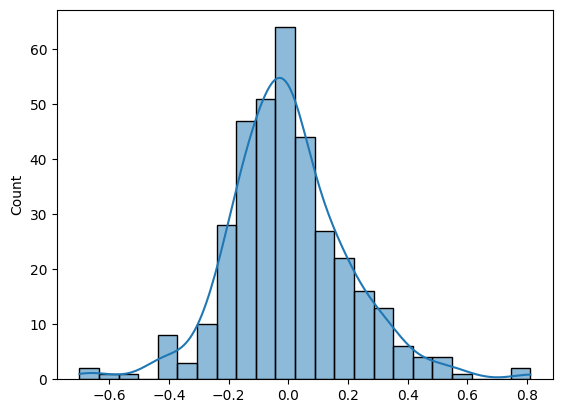

In [ ]:
sns.histplot(model2.resid, kde=True)

The residuals appear to be normal, so that is also good.

### **Linearity of Variables**

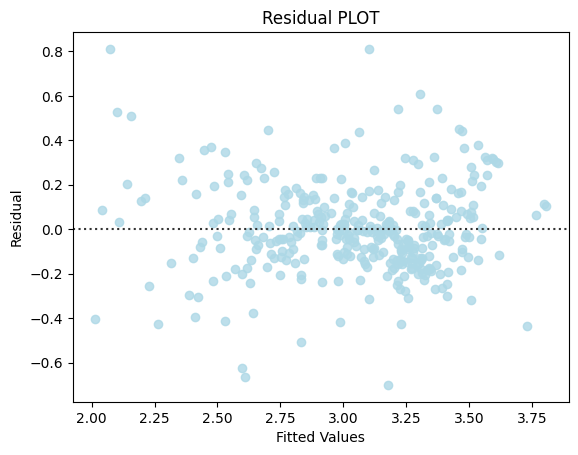

In [ ]:
sns.residplot(x = model2.fittedvalues, y = model2.resid, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

There appears to be no pattern in the reisduals, thus linearity assumption is satisfied

### **No Heteroscedasticity**

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model2.resid, x_train_scaled2)
lzip(name, test)

[('F statistic', 0.9492123859697603), ('p-value', 0.6328005816741369)]

Null hypothesis with the Goldfeld Quandt test is that the residuals are homoscedastic. The p-value is greater than 0.05. Fail to reject the null hypothesis. The residuals are very likely homoscedastic.

Just to test, let log transform the independant variable, and see if that improves results.

In [ ]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
model2_log = sm.OLS(y_train_log, x_train_scaled2).fit()
print(model_perf(model2, x_train_scaled2, y_train, x_test_scaled2, y_test))
print(model_perf(model2_log, x_train_scaled2, y_train_log, x_test_scaled2, y_test_log))

    Data       MAE      RMSE      MAPE        r2
0  Train  0.148326  0.201215  0.050302  0.667710
1   Test  0.162841  0.214486  0.055304  0.677116
None
    Data       MAE      RMSE      MAPE        r2
0  Train  0.049320  0.069612  0.047045  0.664038
1   Test  0.054406  0.074702  0.052394  0.681262
None


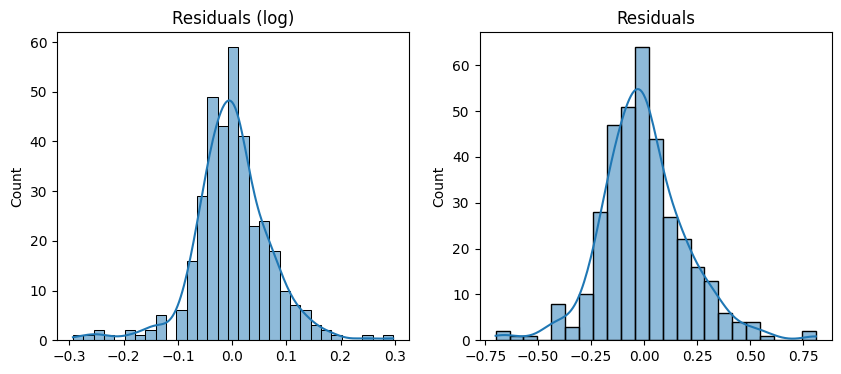

In [ ]:
fig, (left, right) = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(model2_log.resid, kde=True, ax=left)
left.set_title('Residuals (log)')
sns.histplot(model2.resid, kde=True, ax=right)
right.set_title('Residuals')
plt.show()

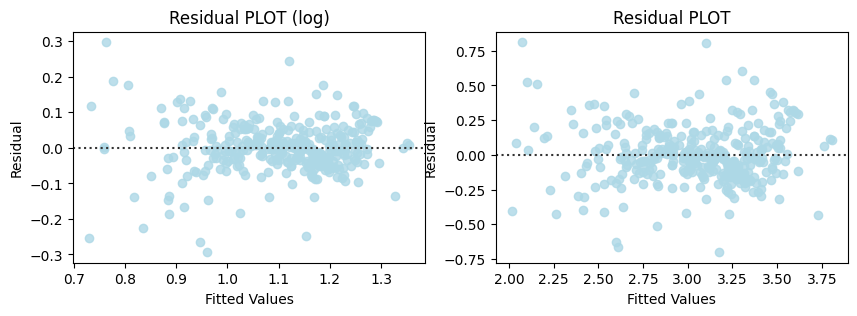

In [ ]:
fig, (left, right) = plt.subplots(1, 2, figsize=(10, 3))
sns.residplot(x = model2_log.fittedvalues, y = model2_log.resid, color="lightblue", ax=left)
left.set_xlabel("Fitted Values")
left.set_ylabel("Residual")
left.set_title("Residual PLOT (log)")
sns.residplot(x = model2.fittedvalues, y = model2.resid, color="lightblue", ax=right)
right.set_xlabel("Fitted Values")
right.set_ylabel("Residual")
right.set_title("Residual PLOT")
plt.show()

In [ ]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model2_log.resid, x_train_scaled2)
print(lzip(name, test))
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model2.resid, x_train_scaled2)
print(lzip(name, test))

[('F statistic', 0.7748104054917923), ('p-value', 0.9514022106593792)]
[('F statistic', 0.9492123859697603), ('p-value', 0.6328005816741369)]


The log version of the model has better or equiv performance.  We will stick with the log version

## Final Model

In [ ]:
# These test predictions will be on a log scale
test_predictions = model2_log.predict(x_test_scaled2)

# We are converting the log scale predictions to its original scale
test_predictions_inverse_transformed = np.exp(test_predictions)

test_predictions_inverse_transformed.describe()

count    152.000000
mean       3.035152
std        0.378317
min        1.853831
25%        2.809589
50%        3.086488
75%        3.295416
max        3.908712
dtype: float64

In [ ]:
y_test.describe()

count    152.000000
mean       3.006046
std        0.420777
min        1.609438
25%        2.792666
50%        3.042136
75%        3.192526
max        3.912023
Name: medv, dtype: float64

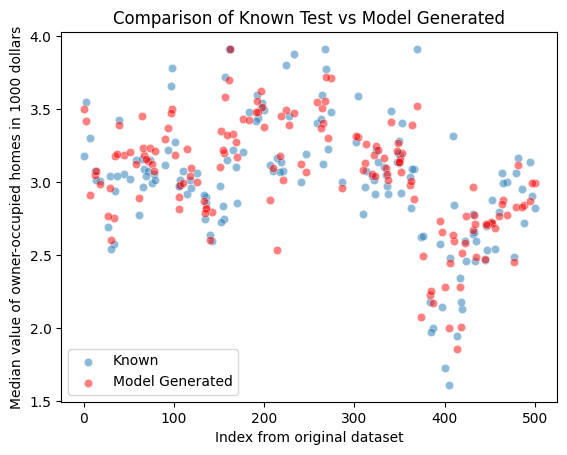

In [ ]:
sns.scatterplot(y_test, label="Known", alpha=0.5);
sns.scatterplot(test_predictions_inverse_transformed, color='red', label='Model Generated', alpha=0.5);
plt.title('Comparison of Known Test vs Model Generated')
plt.legend(loc=3)
plt.xlabel('Index from original dataset')
plt.ylabel(feature_lookup['medv'])
plt.show()

In [ ]:
coef = model2_log.params
coef

crim       -0.307624
nox        -0.077748
dis        -0.126060
ptratio    -0.122294
lstat      -0.428404
chas_no     1.388645
chas_yes    1.448523
dtype: float64

In [ ]:
# Let us write the equation of the model
print("log ( Median Value of Housing ) = Sum of (")
for i in range(len(coef)):
  feat = coef.index[i]
  print('({0:.3f}) * {1}'.format(coef[i],coef.index[i]))
print(")")

print("where")
for i in range(len(coef)):
  feat_text = ''
  feat = coef.index[i]
  if feat.startswith('chas'):
    feat_text = '[' + feat + ']' + ' is ' + feature_lookup['chas']
  else:
    feat_text = '[' + feat + ']' + ' is ' + feature_lookup[feat]
  print(feat_text)

log ( Median Value of Housing ) = Sum of (
(-0.308) * crim
(-0.078) * nox
(-0.126) * dis
(-0.122) * ptratio
(-0.428) * lstat
(1.389) * chas_no
(1.449) * chas_yes
)
where
[crim] is Per capita crime rate by town
[nox] is Nitric Oxide concentration (parts per 10 million)
[dis] is Weighted distances to five Boston employment centers
[ptratio] is Pupil-teacher ratio by town
[lstat] is % lower status of the population
[chas_no] is Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
[chas_yes] is Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)


## Actionable Insights and Recommendations

## Order of value to forecast lower median homes values
1. lstat - A larger population of under educated compared to more educated
2. crim - A higher crime rate
3. dis - Larger distance from boston employment centers
4. ptratio - A higher pupil-teacher ratio
5. nox - Smallest reasonable impact, but higher nox

Additionally, having a tract of land on the charles river is better than not having a tract of long touching it.

**Largest influence**: Lower educated people generally have lower paying jobs. This results in these areas having a lower median house price. This makes sense, as less money to spend on homes also means less money to maintain. Even if neighborhoods have many good attributes, the model shows the lower education goes a long way in keeping housing prices lower.

The Nitric Oxide Concentration isnt having as large as an impact on the model. This might be because these areas tend to be closer to employment centers, and that is more important.







___

In [ ]:
!pip install nbconvert
!jupyter nbconvert '/content/drive/MyDrive/mit-pe/elective project/machine learning/julian_elective_machine_learning.ipynb' --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/mit-pe/elective project/machine learning/julian_elective_machine_learning.ipynb to html
[NbConvertApp] Writing 2890015 bytes to /content/drive/MyDrive/mit-pe/elective project/machine learning/julian_elective_machine_learning.html
